In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv') # reading the data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*It seems that there are no missing values in our data. Great, let's see the distribution of data:*

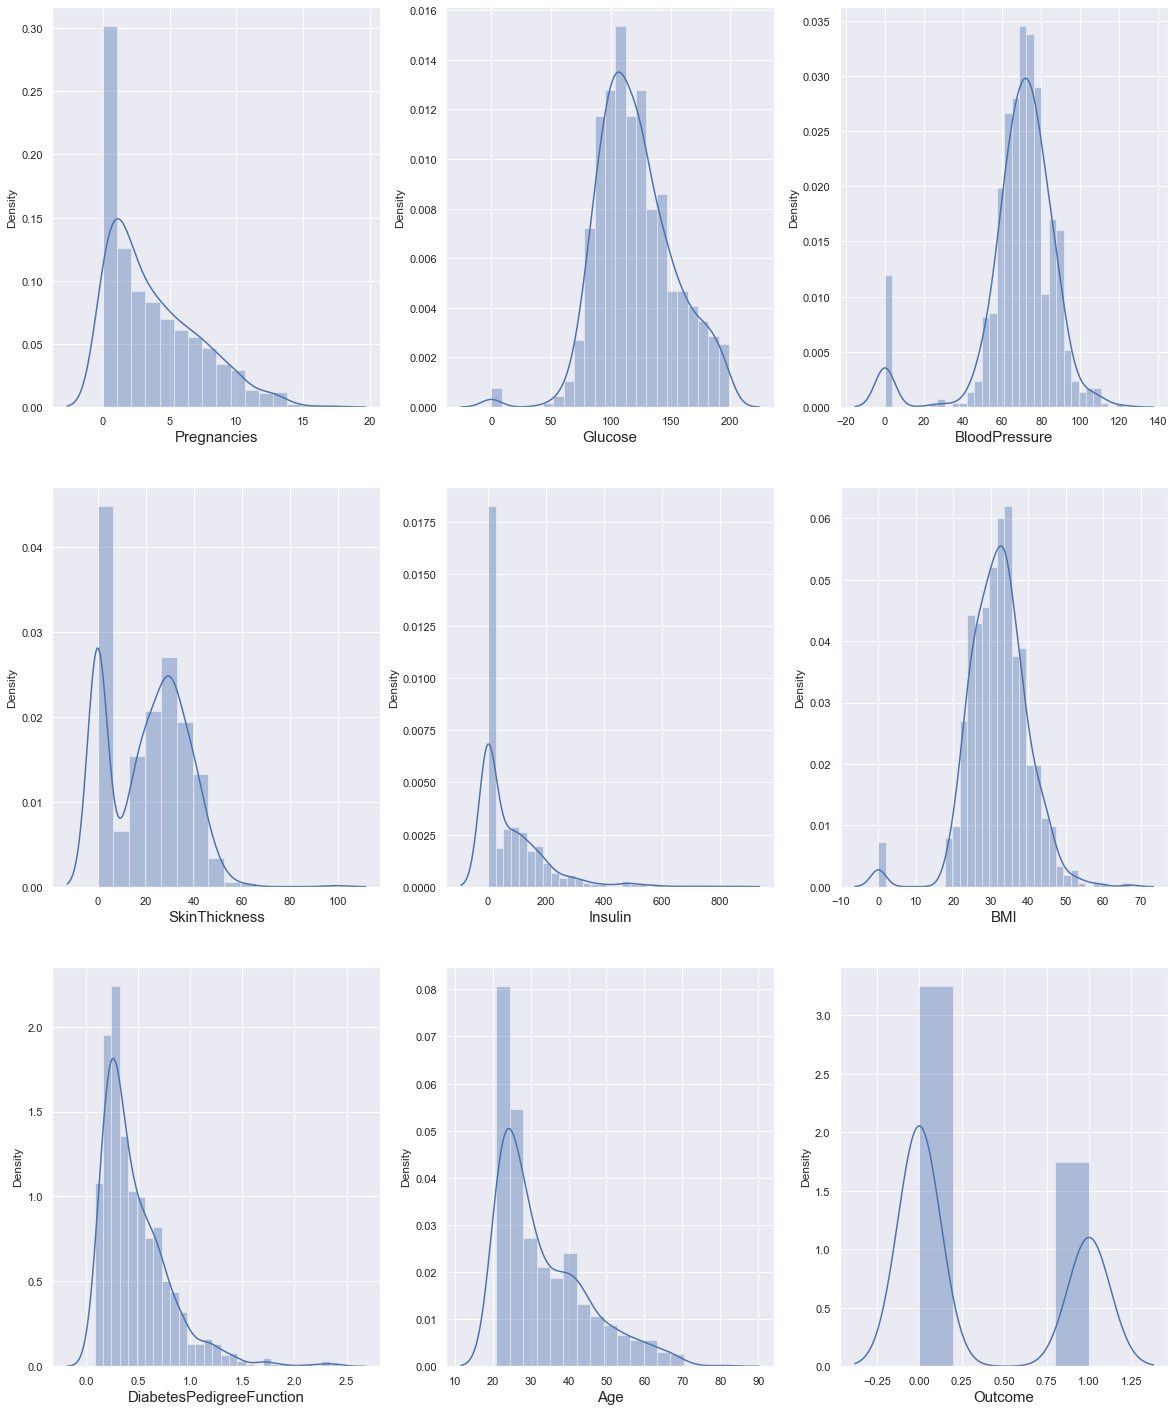

In [5]:
# let's see how data is distributed for every column.

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

We can see that there is some skewness in data , let's deal with data.

Also, we can see that Glucose, Insulin, Skin Thickness, BMI and Blood Pressure which have value as 0. That's not possible. We can either remove such data or simply replace it with their respective mean values.

In [6]:
# replacing zero values with the mean of the columnn

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

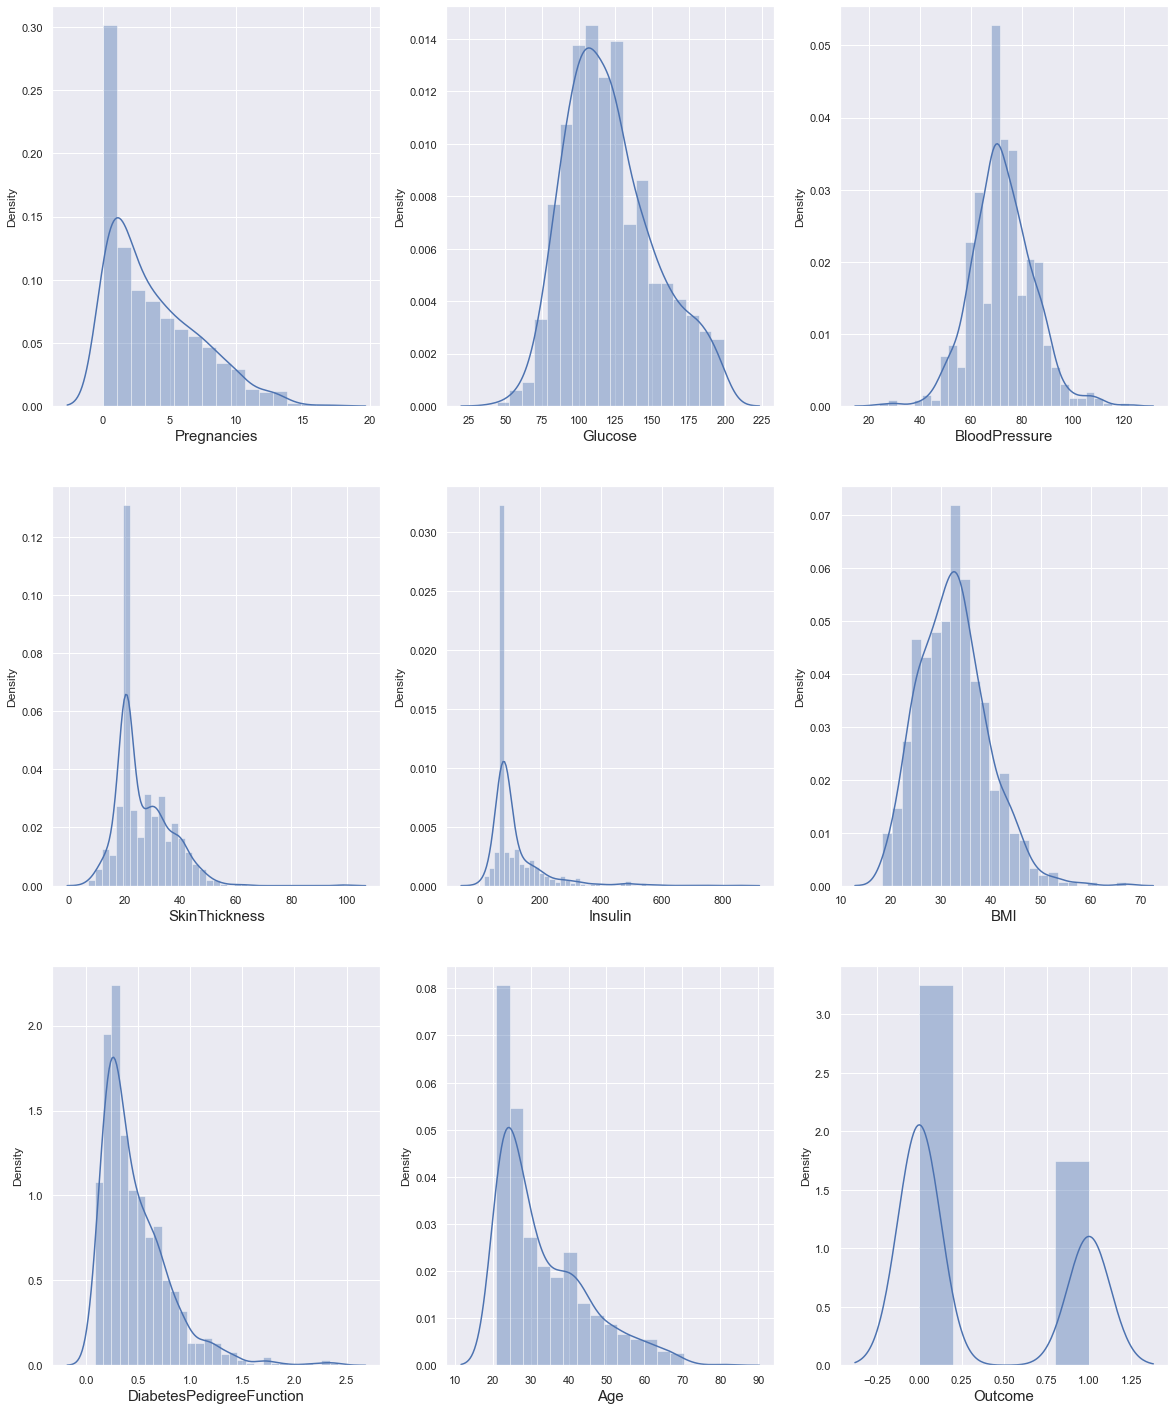

In [7]:
# again checking the data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

Now we have dealt with the 0 values and data looks better.But, there still are outliers present in some columns. Let's deal with them.

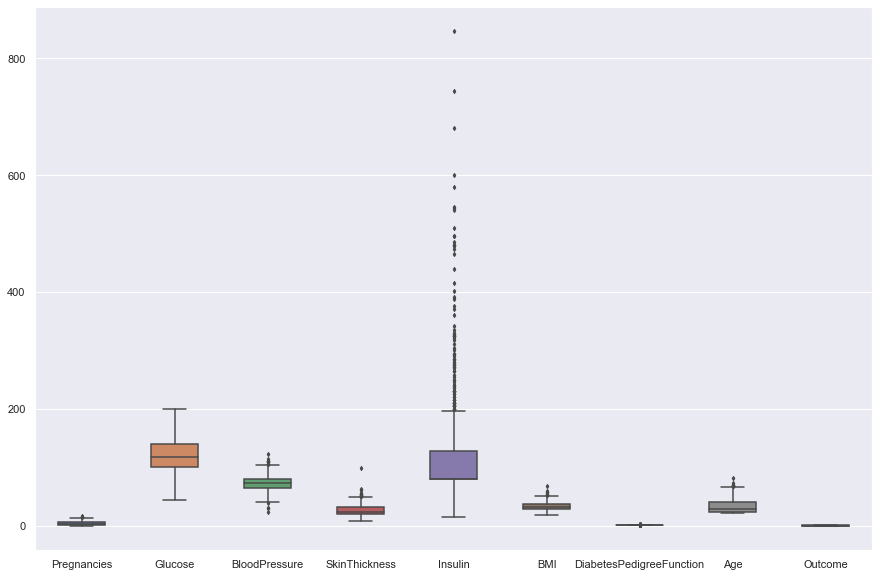

In [8]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [9]:
q = data['Pregnancies'].quantile(0.98)
# removing the top 2% data from the pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# removing the top 1% data from BMI column
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# removing the top 1% data from SkinThickness column
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# removing the top 5% data from Insulin column
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# removing the top 1% data from Age column
data_cleaned = data_cleaned[data_cleaned['Age']<q]

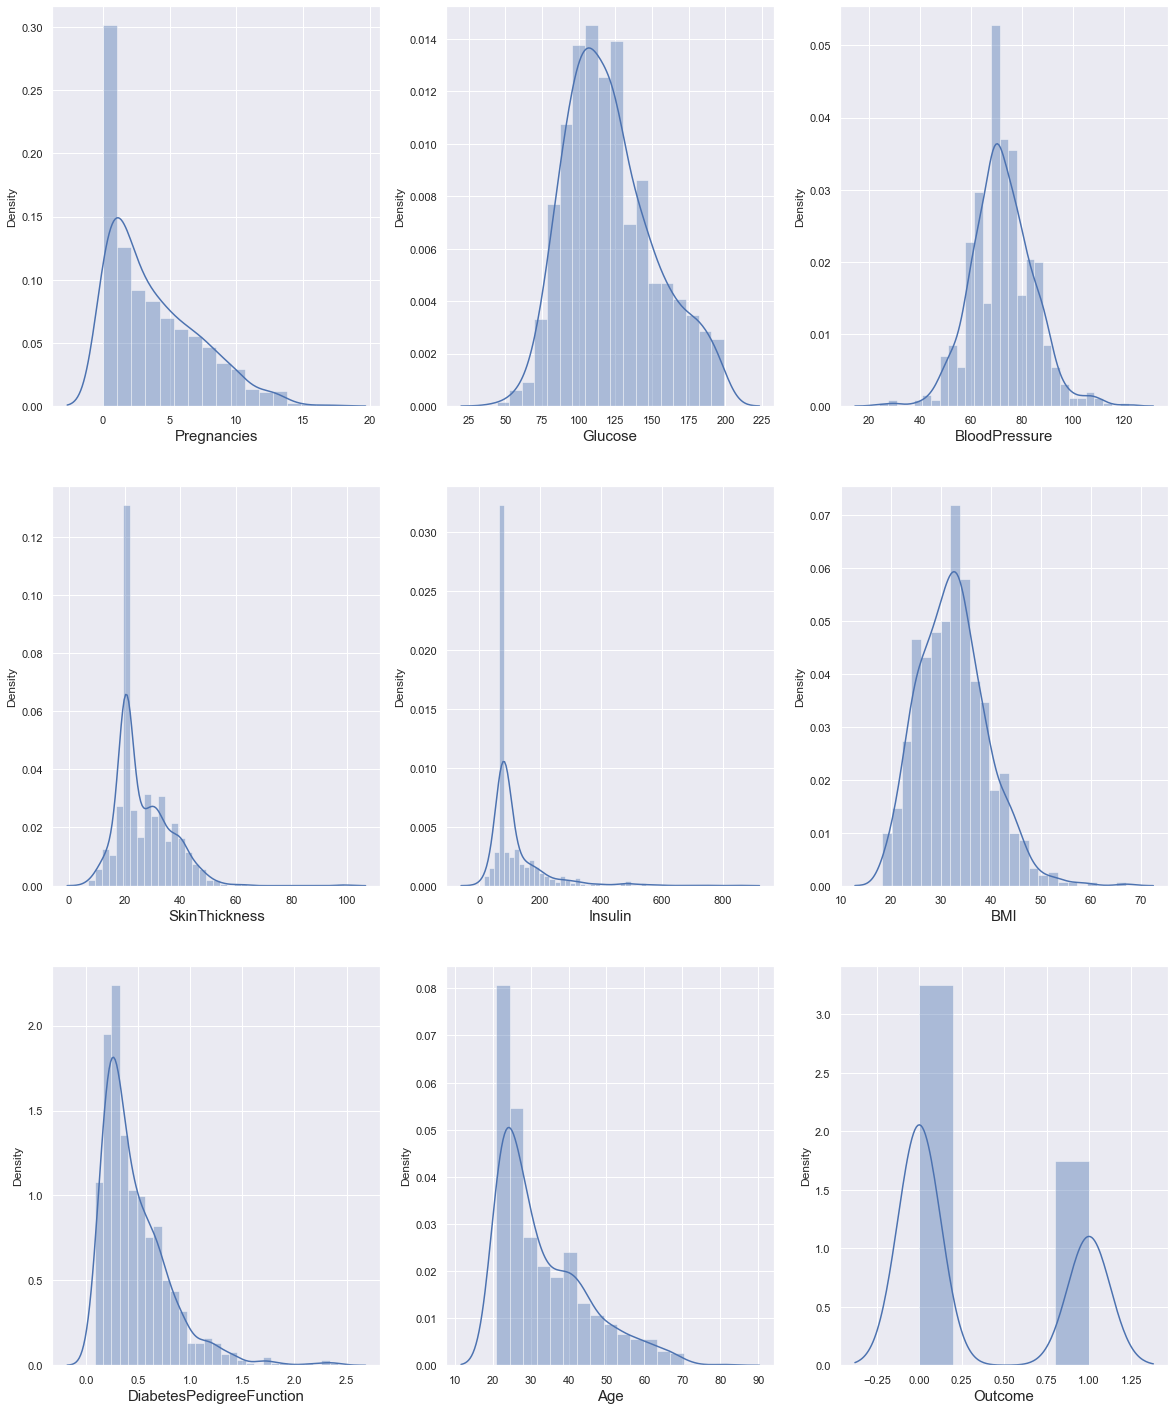

In [10]:
# again checking the data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [11]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

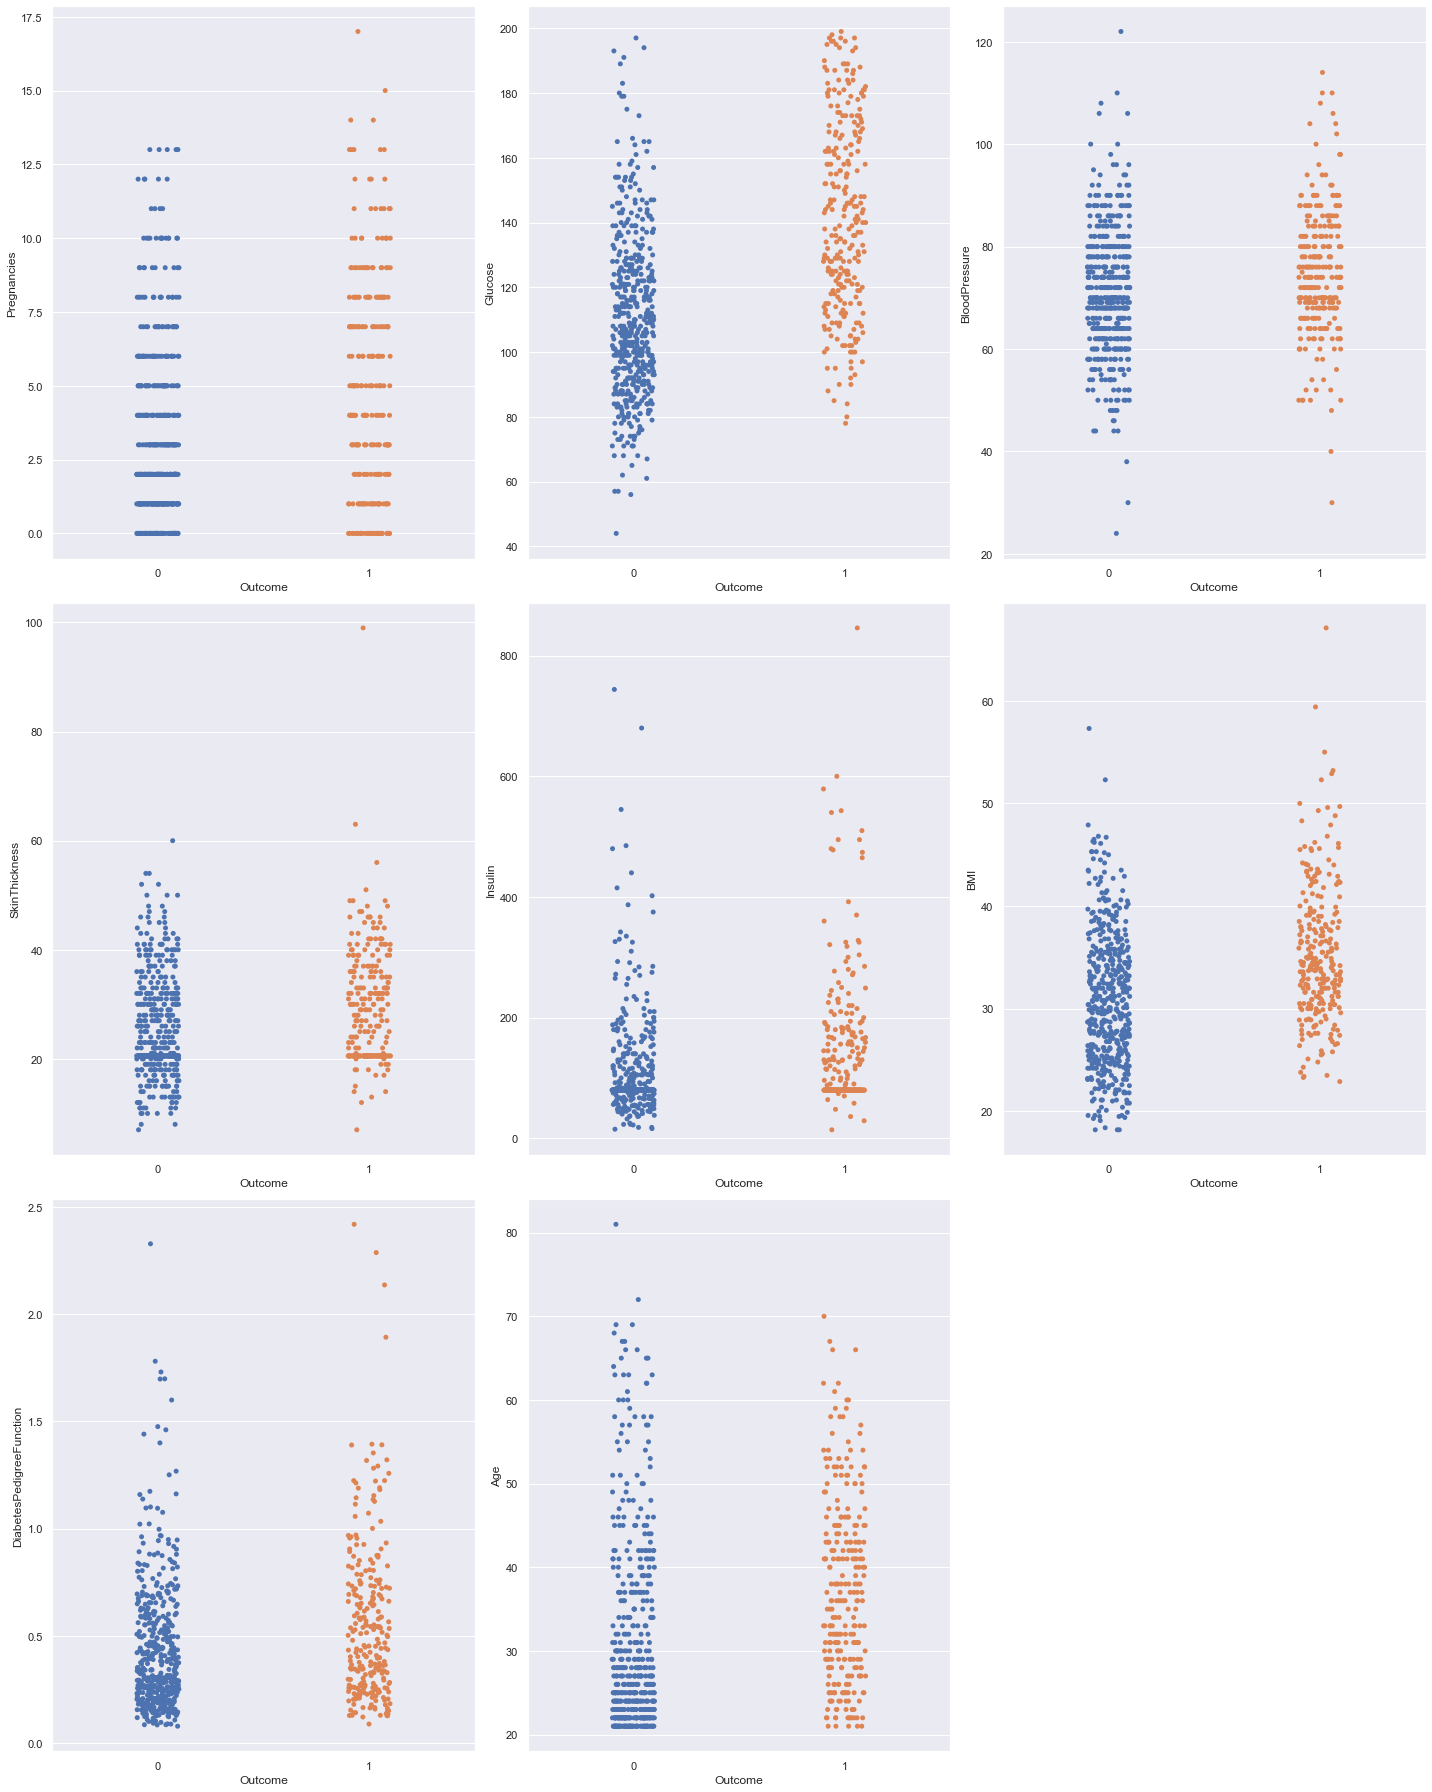

In [12]:
# let's see how data is distributed for every column

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in X:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.stripplot(y, X[column])
        
    plotnumber += 1
    
plt.tight_layout()

In [13]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [15]:
# checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif['features'] = X.columns

# Let's check the values

vif

,VIF,features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


The VIF values are less than 5 and are very low. That means no Multicollinearity. Now we can go ahead with fitting our data to the model.

In [16]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25)

In [17]:
# fitting data to kNN model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [19]:
# training accuracy

knn.score(X_train, y_train)

0.8229166666666666

In [20]:
# test data accuracy

knn.score(X_test, y_test)

0.7239583333333334

Let's try to increase accuracy by using hyperparameter tuning.

In [21]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [15, 18, 20, 25, 17, 30],
    'n_neighbors': [3, 5, 7, 10, 11, 12, 13]
}

In [22]:
grid_search = GridSearchCV(estimator = knn, param_grid = grid_params, n_jobs = -1, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:    2.6s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20, 25, 17, 30],
                         'n_neighbors': [3, 5, 7, 10, 11, 12, 13]},
             verbose=3)

In [23]:
# best parameters

grid_search.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 15, 'n_neighbors': 11}

In [27]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.

knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 15, n_neighbors = 11)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=11)

In [28]:
knn.score(X_train,y_train)

0.7951388888888888

Looks like accuracy of training has decreased, maybe our model was overfitting the data before.

In [29]:
knn.score(X_test,y_test)

0.7395833333333334

Accuracy score has increased for our test data. So, our  model was overfitting before.

Let's now use k-fold cross validation and check how well our model is generalizing over our dataset: We are randomly selecting our k to be 12 for k fold.

In [30]:
# k-fold cross validation 

from sklearn.model_selection import KFold

kfold = KFold(n_splits = 12, random_state = 42)
kfold.get_n_splits(X_scaled)

12

In [37]:
from statistics import mean

knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 15, n_neighbors = 11)

cnt = 0
count = []
training_score = []
testing_score = []

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(X_train, y_train)
    
    training_score_ = knn.score(X_train, y_train)
    testing_score_ = knn.score(X_test, y_test)
    
    cnt += 1
    count.append(cnt)
    
    training_score.append(training_score_)
    testing_score.append(testing_score_)
    
    print("for k = ", cnt)
    print("Training Score is : ", training_score_, "and Testing Score is : ", testing_score_)
    
print("*********************************************")
print("*********************************************")
print("Average Training Score is : ", mean(training_score))
print("Average Testing Score is : ", mean(testing_score))

for k =  1
Training Score is :  0.8068181818181818 and Testing Score is :  0.6875
for k =  2
Training Score is :  0.7926136363636364 and Testing Score is :  0.765625
for k =  3
Training Score is :  0.7954545454545454 and Testing Score is :  0.78125
for k =  4
Training Score is :  0.7997159090909091 and Testing Score is :  0.734375
for k =  5
Training Score is :  0.7940340909090909 and Testing Score is :  0.65625
for k =  6
Training Score is :  0.7954545454545454 and Testing Score is :  0.765625
for k =  7
Training Score is :  0.7997159090909091 and Testing Score is :  0.703125
for k =  8
Training Score is :  0.7926136363636364 and Testing Score is :  0.734375
for k =  9
Training Score is :  0.7840909090909091 and Testing Score is :  0.890625
for k =  10
Training Score is :  0.7997159090909091 and Testing Score is :  0.796875
for k =  11
Training Score is :  0.7997159090909091 and Testing Score is :  0.734375
for k =  12
Training Score is :  0.7911931818181818 and Testing Score is :  0.

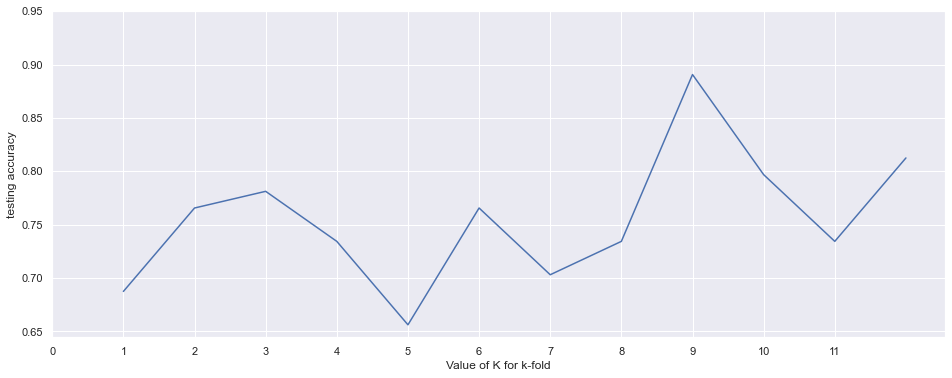

In [40]:
# let's plot the testing_accuracy with the value of k in k fold

plt.figure(figsize = (16, 6))
plt.plot(count, testing_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('testing accuracy')
plt.xticks(np.arange(0, 12, 1))
plt.yticks(np.arange(0.65, 1, 0.05))

plt.show()